In [2]:
!where python

C:\Users\Srimurugan\anaconda3\python.exe
C:\Users\Srimurugan\AppData\Local\Programs\Python\Python313\python.exe
C:\Users\Srimurugan\AppData\Local\Programs\Python\Python312\python.exe
C:\Users\Srimurugan\AppData\Local\Microsoft\WindowsApps\python.exe


In [3]:
import cv2
import matplotlib.pyplot as plt

In [4]:
config_file = 'ssd_mobilenet_v3_large_coco_2020_01_14.pbtxt'
frozen_model ='frozen_inference_graph.pb'

In [5]:
model = cv2.dnn_DetectionModel(frozen_model,  config_file) 

In [6]:
classLabels = []
file_names = 'labels.txt'
with open(file_names, 'rt') as fpt:
    classLabels = fpt.read().rstrip('\n').split('\n')

In [7]:
print(classLabels)

['person', 'bicycle', 'car', 'motorbike', 'aeroplane', 'bus', 'train', 'truck', 'boat', 'traffic light', 'fire hydrant', 'stop sign', 'parking meter', 'bench', 'bird', 'cat', 'dog', 'horse', 'sheep', 'cow', 'elephant', 'bear', 'zebra', 'giraffe', 'backpack', 'umbrella', 'handbag', 'tie', 'suitcase', 'frisbee', 'skis', 'snowboard', 'sports ball', 'kite', 'baseball bat', 'baseball glove', 'skateboard', 'surfboard', 'tennis racket', 'bottle', 'wine glass', 'cup', 'fork', 'knife', 'spoon', 'bowl', 'banana', 'apple', 'sandwich', 'orange', 'broccoli', 'carrot', 'hot dog', 'pizza', 'donut', 'cake', 'chair', 'sofa', 'pottedplant', 'bed', 'diningtable', 'toilet', 'tvmonitor', 'laptop', 'mouse', 'remote', 'keyboard', 'cell phone', 'microwave', 'oven', 'toaster', 'sink', 'refrigerator', 'book', 'clock', 'vase', 'scissors', 'teddy bear', 'hair drier', 'toothbrush']


In [8]:
print(len(classLabels))

80


In [9]:
model.setInputSize(320, 320)
model.setInputScale(1.0/127.5)
model.setInputMean((127.5, 127,5, 127.5))
model.setInputSwapRB(True)

< cv2.dnn.Model 000002CA04081FF0>

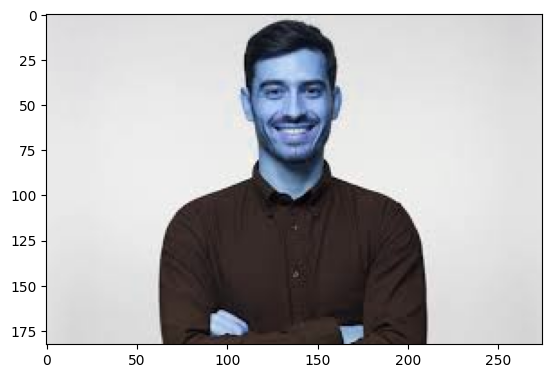

In [10]:
import cv2
import matplotlib.pyplot as plt

# Ensure the correct file extension
img = cv2.imread('person.jpg') 

plt.imshow(img)



In [11]:
classindex, confidence, bbox = model.detect(img, confThreshold = 0.5)
print(classindex)

[1]


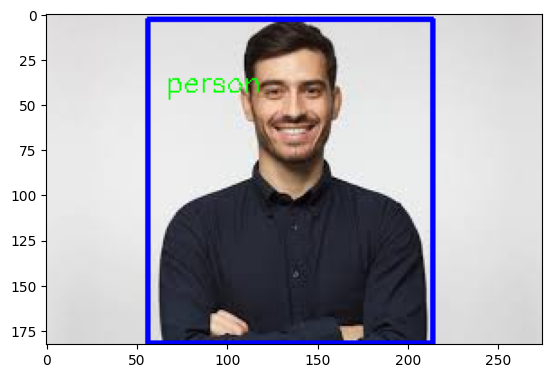

In [12]:

font = cv2.FONT_HERSHEY_SIMPLEX  # Corrected typo in the font name

# Iterate over ClassIndex, confidence, and bbox
for ClassInd, conf, boxes in zip(classindex.flatten(), confidence.flatten(), bbox):  # Fixed typo in 'confidence.flatten()'
    cv2.rectangle(img, boxes, (255, 0, 0), 2)
    
    cv2.putText(
        img, 
        classLabels[ClassInd - 1],  # Correct class index
        (boxes[0] + 10, boxes[1] + 40),  # Corrected the argument for text position
        font, 
        fontScale=0.5,  # Fixed fontScale syntax
        color=(0, 255, 1),  # Corrected color tuple
        thickness=1
    )

# Display the image using matplotlib
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))  # Corrected 'COLOR_BGR2BRG'
plt.show()


In [14]:
import cv2
import time
from matplotlib import pyplot as plt
from IPython.display import clear_output

# Load model
model = cv2.dnn_DetectionModel(frozen_model, config_file)
model.setInputSize(320, 320)
model.setInputScale(1.0 / 127.5)
model.setInputMean((127.5, 127.5, 127.5))
model.setInputSwapRB(True)

# List of class labels (update as needed)
classLabels = ['person', 'bicycle', 'car', ...]  # your full label list

# Open video file
cap = cv2.VideoCapture('video_for_object_detection.mp4')
if not cap.isOpened():
    raise IOError('Cannot open the video')

font = cv2.FONT_HERSHEY_PLAIN

try:
    while True:
        ret, frame = cap.read()
        if not ret:
            break

        display_frame = frame.copy()
        classIndex, confidence, bbox = model.detect(frame, confThreshold=0.55)

        if len(classIndex) != 0:
            for classInd, conf, box in zip(classIndex.flatten(), confidence.flatten(), bbox):
                if classInd <= len(classLabels):
                    x, y, w, h = box
                    cv2.rectangle(display_frame, (x, y), (x + w, y + h), (255, 0, 0), 2)
                    cv2.putText(display_frame, classLabels[classInd - 1], (x, y - 10),
                                font, fontScale=1, color=(0, 255, 0), thickness=2)

        # Convert BGR to RGB for matplotlib
        frame_rgb = cv2.cvtColor(display_frame, cv2.COLOR_BGR2RGB)

        # Clear and display
        clear_output(wait=True)
        plt.imshow(frame_rgb)
        plt.axis('off')
        plt.title("Object Detection")
        plt.show()

        time.sleep(0.05)  # simulate delay

except KeyboardInterrupt:
    print("Stopped manually.")

cap.release()


Stopped manually.


In [16]:
import cv2

# Attempt to open the video file
cap = cv2.VideoCapture('video_for_object_detection.mp4')
if not cap.isOpened():
    raise IOError("Cannot open the video file. Check the file path or format!")

while True:
    ret, frame = cap.read()
    if not ret:
        print("Failed to retrieve frame. Exiting.")
        break

    # Resize the frame to fit better on your screen (e.g., 1280x720)
    frame_resized = cv2.resize(frame, (1280, 720))

    # Check the resized frame dimensions
    print("Resized frame dimensions:", frame_resized.shape)  # Should print 720p dimensions

    # Display the resized frame
    cv2.imshow("Video Frame", frame_resized)

    if cv2.waitKey(2) & 0xFF == ord('q'):
        break

cap.release()
cv2.destroyAllWindows()


Resized frame dimensions: (720, 1280, 3)


error: OpenCV(4.11.0) D:\a\opencv-python\opencv-python\opencv\modules\highgui\src\window.cpp:1301: error: (-2:Unspecified error) The function is not implemented. Rebuild the library with Windows, GTK+ 2.x or Cocoa support. If you are on Ubuntu or Debian, install libgtk2.0-dev and pkg-config, then re-run cmake or configure script in function 'cvShowImage'
